In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
hr = pd.read_csv("HR_comma_sep.csv")
hr.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr.shape

(14999, 10)

In [4]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

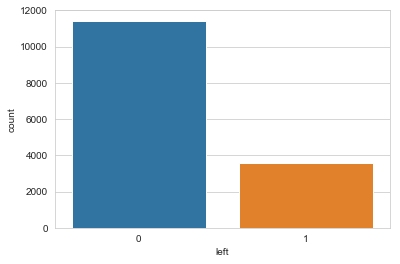

In [5]:
sns.set_style('whitegrid')
sns.countplot('left',data=hr)

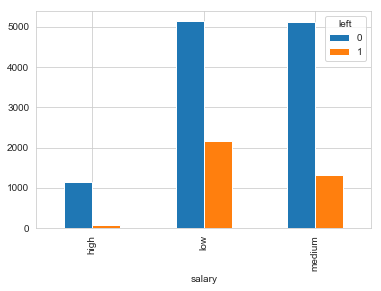

In [6]:
pd.crosstab(hr.salary,hr.left).plot(kind='bar')

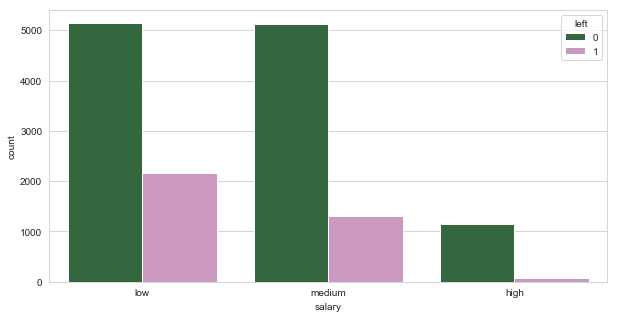

In [7]:
plt.figure(figsize=(10,5))
sns.countplot('salary',data=hr,hue='left',palette='cubehelix')

In [8]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
hr.drop(['last_evaluation','number_project','time_spend_company','Work_accident','Department'],axis=1,inplace=True)

In [10]:
hr.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary
0,0.38,157,1,0,low
1,0.80,262,1,0,medium
2,0.11,272,1,0,medium
3,0.72,223,1,0,low
4,0.37,159,1,0,low


In [11]:
sal = pd.get_dummies(hr['salary'],drop_first=True)

In [12]:
sal.head()

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [13]:
hr = pd.concat([hr,sal],axis=1)

In [14]:
hr.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary,low,medium
0,0.38,157,1,0,low,1,0
1,0.80,262,1,0,medium,0,1
2,0.11,272,1,0,medium,0,1
3,0.72,223,1,0,low,1,0
4,0.37,159,1,0,low,1,0


In [15]:
hr.drop('salary',axis=1,inplace=True)

In [16]:
hr.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,low,medium
0,0.38,157,1,0,1,0
1,0.80,262,1,0,0,1
2,0.11,272,1,0,0,1
3,0.72,223,1,0,1,0
4,0.37,159,1,0,1,0


In [17]:
x = hr.drop('left',axis=1)
y = hr.left

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
predictions = model.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test,predictions)

array([[3235,  227],
       [ 769,  269]], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,predictions)

0.7786666666666666